## 1.0 Business Understanding

Microsoft, a prominent force in the global technology sector, is expanding its horizons by venturing into the entertainment industry with the establishment of a new movie studio. This endeavor seeks to capitalize on Microsoft's extensive resources, widespread influence, and innovative prowess to develop compelling and unique films, thereby broadening its range of offerings.

# Domain of the Business

The domain of this business venture is the film and entertainment industry. Microsoft intends to produce, distribute, and promote movies for theatrical release and streaming platforms. 

# Business Objective

To build a thriving movie studio that creates entertaining and captivating films, resonating with a broad spectrum of audiences and driving profitable returns

# Data Understanding

This dataset comprises two main tables. The first table has 6 columns. These columns provide information about various movies, including their titles, release years, durations, genres, and ratings.

The second dataset contains 6 columns. This table focuses on financial aspects, including production budgets, domestic and worldwide gross earnings, and release dates.

The analysis contains the following:
1. Business Understanding
2. Importing libraries and datasets
3. Previewing the datasets
4. Data Cleaning
5. Exploratory data analysis(Univeriate, Bivariate and Multivariate)
6. Summary
7. Recommendations

## 2.0 Importing Data

In [117]:
# We begin by importing the relevant libraries that will be used
import matplotlib.pyplot as plt 
import sqlite3
import pandas as pd 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [118]:
data=pd.read_csv("tn.movie_budgets.csv.gz")

In [119]:
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [120]:
imdb=r"/Users/mitchmathiu/projects/phase/Movie-Project/im.db"
conn=sqlite3.connect(imdb)

## 3.0 Preview of Information in the data

Here we just want to have a look at whats contained in the IMDB dataset and just have a proper feel of whats contained in the dataset

In [121]:
#from the imdb database we first want to know the names and number of the tables.
query0=("""
    SELECT name
    AS 'Table_Name'
    FROM sqlite_master
    WHERE type = 'table'
;
""")
pd.read_sql(query0,conn)

,Table_Name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [122]:
# checking for the information contained in the movie basics table
query1 = ("""
    SELECT * 
    FROM movie_basics
    ;
          """)
df = pd.read_sql(query1,conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [123]:
# checking for the information contained in the movie ratings table
query1 = ("""
    SELECT * 
    FROM movie_ratings
    ;
          """)
df1 = pd.read_sql(query1,conn)
df1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [124]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


To get the preview of information from the data in a simplified way, we will define another function that will help do so

In [125]:
#Creating a function to preview the dataframe 
def dataframe_preview(df):
    #To get the shape of the dataframe
    print("The shape of the dataframe:")
    print(df.shape)
    print('\n')
    #To get the info of the dataframe
    print("The data in the dataframe:")
    print(df.info())
    print('\n')
    #To get the columns of the dataframe
    print("The columns of the dataframe are:")
    print(df.columns)


In [126]:
#Calling the function
dataframe_preview(df)

The shape of the dataframe:
(146144, 6)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


The columns of the dataframe are:
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


Now that we have a feel of the movie_basics, well also explore movie_ratings table

In [127]:
#query to create dataframe 
query2 = ("""
    SELECT * 
    FROM movie_ratings
    ;
        """)
df2 = pd.read_sql(query2,conn)
df2.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [128]:
#We will call the function dataframe preview to view the info in the dataframe
dataframe_preview(df2)

The shape of the dataframe:
(73856, 3)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


The columns of the dataframe are:
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')


## 4.0 Data Cleaning

In [129]:
#Joining the tables using the movie_id column
query3 = ("""
SELECT movie_id, primary_title,start_year,runtime_minutes,genres,averagerating AS 'movie_rating',numvotes
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
;
""")
df = pd.read_sql(query3,conn)

In [130]:
#previewing the first 5 rows of joined dataframe 
df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,movie_rating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [131]:
#previewing columns 
df.columns

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'movie_rating', 'numvotes'],
      dtype='object')

In [132]:
#checking null values
df.isnull().sum()

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
movie_rating          0
numvotes              0
dtype: int64

In [133]:
#checking percentage of null values 
percentagenull = df.isnull().sum() / len(df) * 100 
percentagenull

movie_id            0.000000
primary_title       0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
movie_rating        0.000000
numvotes            0.000000
dtype: float64

In [134]:
#dropping the missing values 
df.dropna(inplace=True)

In [135]:
#checking whether null values have been dropped 
df.isnull().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
movie_rating       0
numvotes           0
dtype: int64

In [136]:
#checking for duplicates 
df.duplicated().any()

False

### Conversion of data types

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [138]:
#conversion of release date from object to datetime 
data['release_date'] = pd.to_datetime(data['release_date'])

In [139]:
#checking for the duration of info in the budget dataframe
start_date = data['release_date'].min()
end_date = data['release_date'].max()

print(f'the start date is {start_date} and the end date is {end_date}')

the start date is 1915-02-08 00:00:00 and the end date is 2020-12-31 00:00:00


From this there a few issues:
1. The first date is 1915 which is significantly a long time ago and the film and production industry has changed in one way or another. 
We will now convert the dataframe to start in the the year 2000 - 2019 which are relevant to the analysis
2. 2020 has no gross earnings

In [140]:
start_date = pd.to_datetime('2000-1-1 00:00:00')
end_date = pd.to_datetime('2019-12-31 00:00:00')
data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]

In [141]:
#checking summury statistics of the dataset
df.describe()

,start_year,runtime_minutes,movie_rating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


From this we have a few issues in regards to runtime
1. The minimum runtime is 3 minutes which is quite low to meet a movie threshold
2. The maximum runtime is 51420 which an extreme value

In [142]:
# Filtering the values to include a minimum threshold of 20 minutes and 180 minutes 
clean_runtime = df[(df['runtime_minutes'] >= 20) & (df['runtime_minutes'] <= 180)]
sum_of_movies_within_threshold = len(clean_runtime)
print('The movies within the threshold are:', sum_of_movies_within_threshold)

The movies within the threshold are: 65365


In [143]:
# Converting the dataframe to drop all values outside the threshold
df = df[(df['runtime_minutes'] >= 20) & (df['runtime_minutes'] <= 200)]

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4384 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4384 non-null   int64         
 1   release_date       4384 non-null   datetime64[ns]
 2   movie              4384 non-null   object        
 3   production_budget  4384 non-null   object        
 4   domestic_gross     4384 non-null   object        
 5   worldwide_gross    4384 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 239.8+ KB


The prodution_budget,domestic_gross and worldwide_gross are denoted as objects and we need them as float in order to mathematical computations

In [145]:
#Conversion of The prodution_budget,domestic_gross and worldwide_gross to float
data['production_budget'] = data['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
data['domestic_gross'] = data['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
data['worldwide_gross'] = data['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

## 5.0 Explarotary Analysis

In [146]:
#checking for the year and duration of the release dates in imdb dataset
start_date = df['start_year'].min()
end_date = df['start_year'].max()
period_taken = end_date - start_date

print('start:', start_date)
print('stop:', end_date)
print('durarion:', period_taken,'years')

start: 2010
stop: 2019
durarion: 9 years


In [147]:
#checking for the duration of info in the budget dataframe
start_date = budgetDF['release_date'].min()
end_date = budgetDF['release_date'].max()
period_taken = end_date -  start_date

print('The start date is', start_date)
print('The end date id', end_date)
print('Period of the dataset is', period_taken)

The start date is 2000
The end date id 2019
Period of the dataset is 19


5.1 Univariate Analysis

In [148]:
#Checking summury statistics for primary title column 
df['primary_title'].describe()

count          65449
unique         62195
top       The Return
freq              10
Name: primary_title, dtype: object

In [149]:
#Checking for the most common genre
df['genres'].describe()

count     65449
unique      905
top       Drama
freq      10160
Name: genres, dtype: object

In [150]:
#checking for the top 5 genres 
top5genres=df['genres'].value_counts().head()

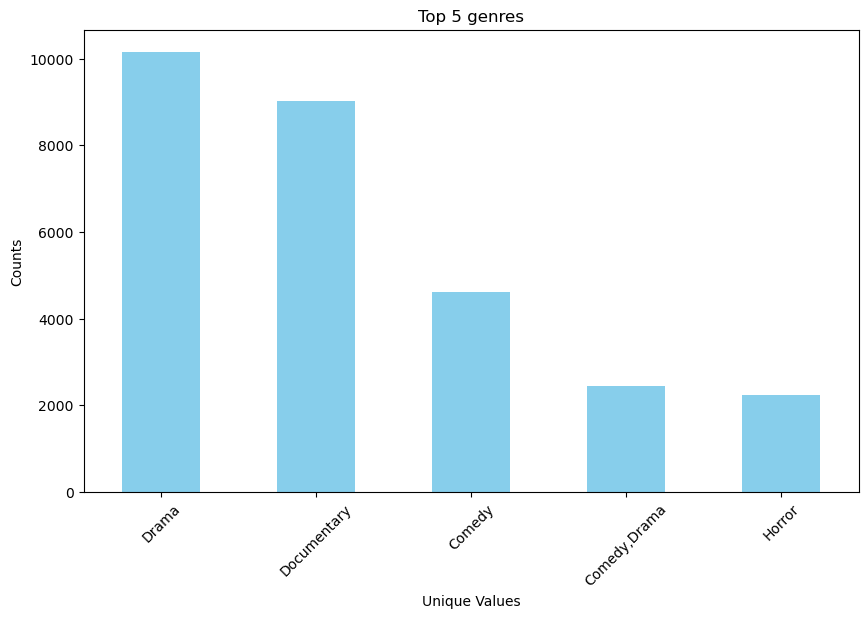

In [151]:
#visualizing the top 5 genres 
plt.figure(figsize=(10, 6))
top5genres.plot(kind='bar', color='skyblue')
plt.title('Top 5 genres')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()


5.2 Bivariate Analysis

How has the average movie runtime changed over the years?

In [152]:
#Checking for the average movie runtime through the years
runtime_changes_over_years = df.groupby('start_year')['runtime_minutes'].mean()
print(runtime_changes_over_years)

start_year
2010    92.084137
2011    91.889349
2012    91.508410
2013    92.235916
2014    93.131877
2015    93.167301
2016    93.576630
2017    94.554109
2018    96.542604
2019    99.883565
Name: runtime_minutes, dtype: float64


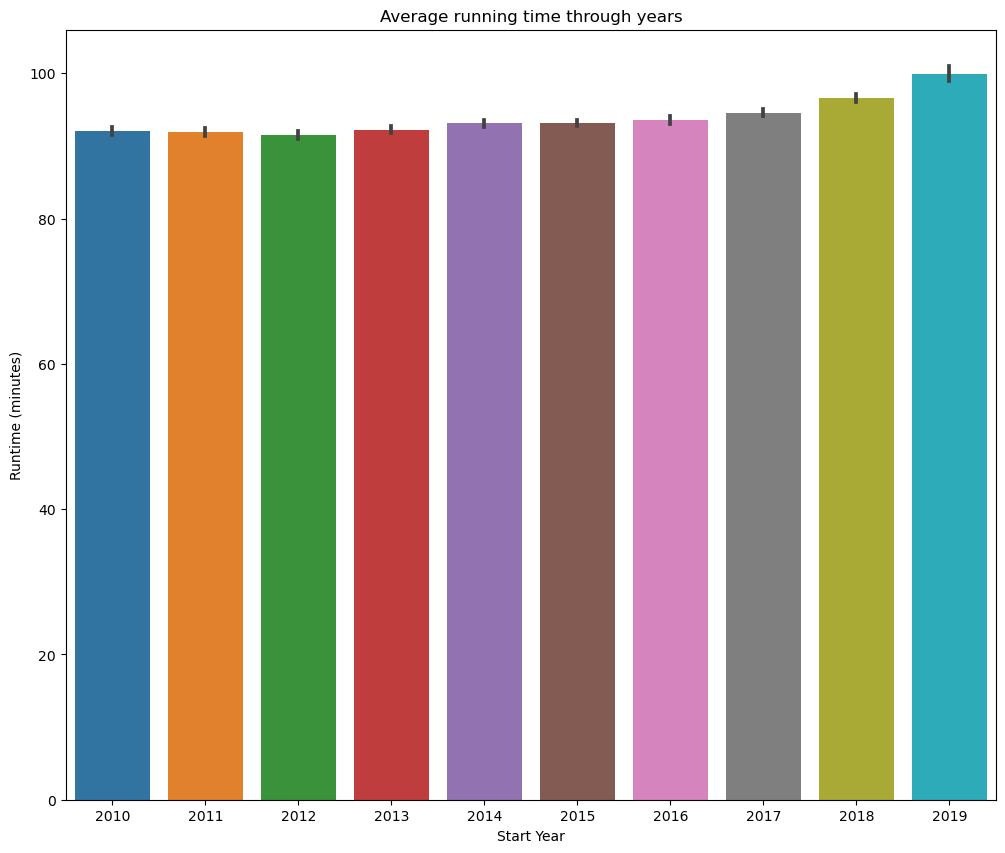

In [153]:
#To visualize the average runtime through the years
plt.figure(figsize=(12,10))
sns.barplot(x='start_year', y='runtime_minutes', data=df)
plt.title('Average running time through years')
plt.xlabel('Start Year')
plt.ylabel('Runtime (minutes)')
plt.show()

This shows that the average runtime for movies from 2010 -2019 has been 90 minutes. This implies that the ideal running time for a film is 90 minutes.

Checking the number of movies produced in a year

In [154]:
#checking for the count of movies produced each year
df['start_year'].value_counts()

start_year
2016    7745
2017    7679
2015    7621
2014    7507
2013    7189
2012    6837
2018    6537
2011    6525
2010    6014
2019    1795
Name: count, dtype: int64

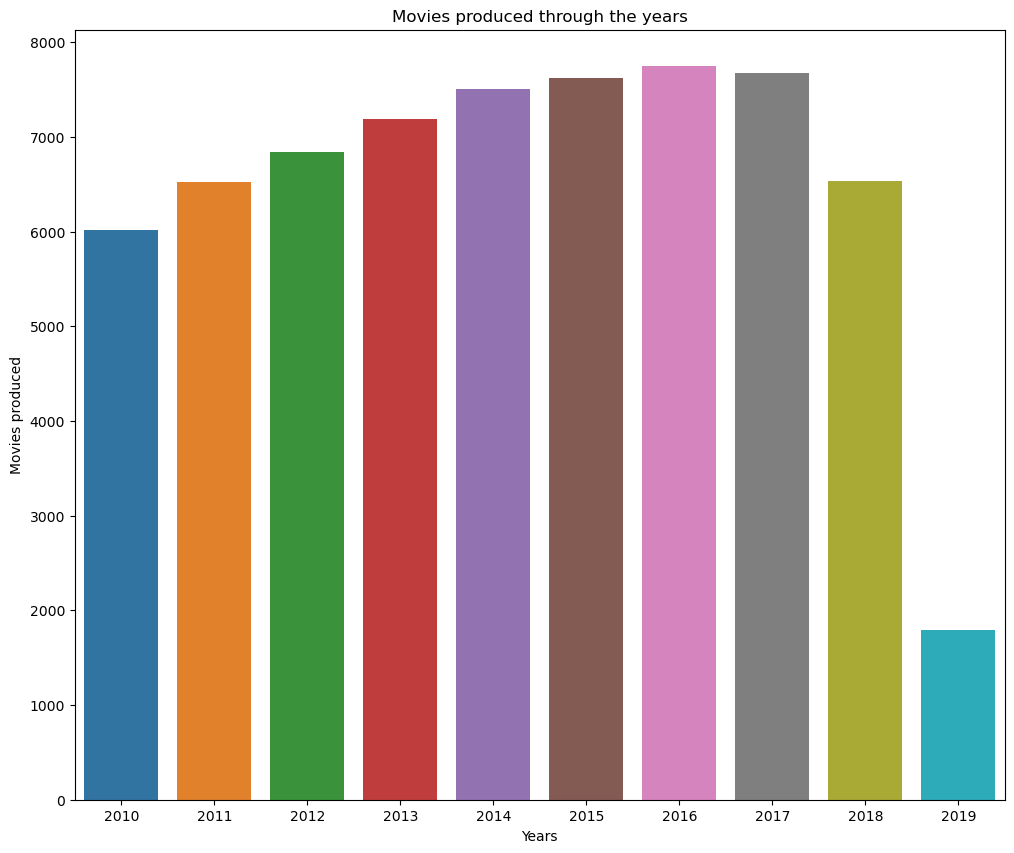

In [155]:
#To visualize this movies produced through the years
plt.figure(figsize=(12,10))
sns.countplot(x='start_year',data=df)
plt.title('Movies produced through the years')
plt.xlabel('Years')
plt.ylabel('Movies produced')
plt.show()

From this countplot we see that in the year 2019 the production of films significantly reduced

Analyzing the distribution between Genres and Runtime

In [156]:
#Checking for the the first 10 movies with the highest runtimes and their genres
top_10_runtime = df.nlargest(10,'runtime_minutes')[['primary_title','runtime_minutes','genres']].set_index('primary_title')
top_10_runtime

,runtime_minutes,genres
primary_title,,
The Last Pogo Jumps Again,200.0,"Documentary,Music"
Sadiyaan: Boundaries Divide... Love Unites,200.0,"Drama,Romance"
Dickshark,200.0,"Comedy,Sci-Fi"
National Theatre Live: Jane Eyre,200.0,Drama
Walk in My Shoes,200.0,Drama
Jai Bhim Comrade,199.0,Documentary
Tmár a jeho rod aneb Slzavé údolí pyramid,199.0,"Documentary,Mystery"
National Theatre Live: Othello,198.0,Drama
0.5 Mm,198.0,Drama


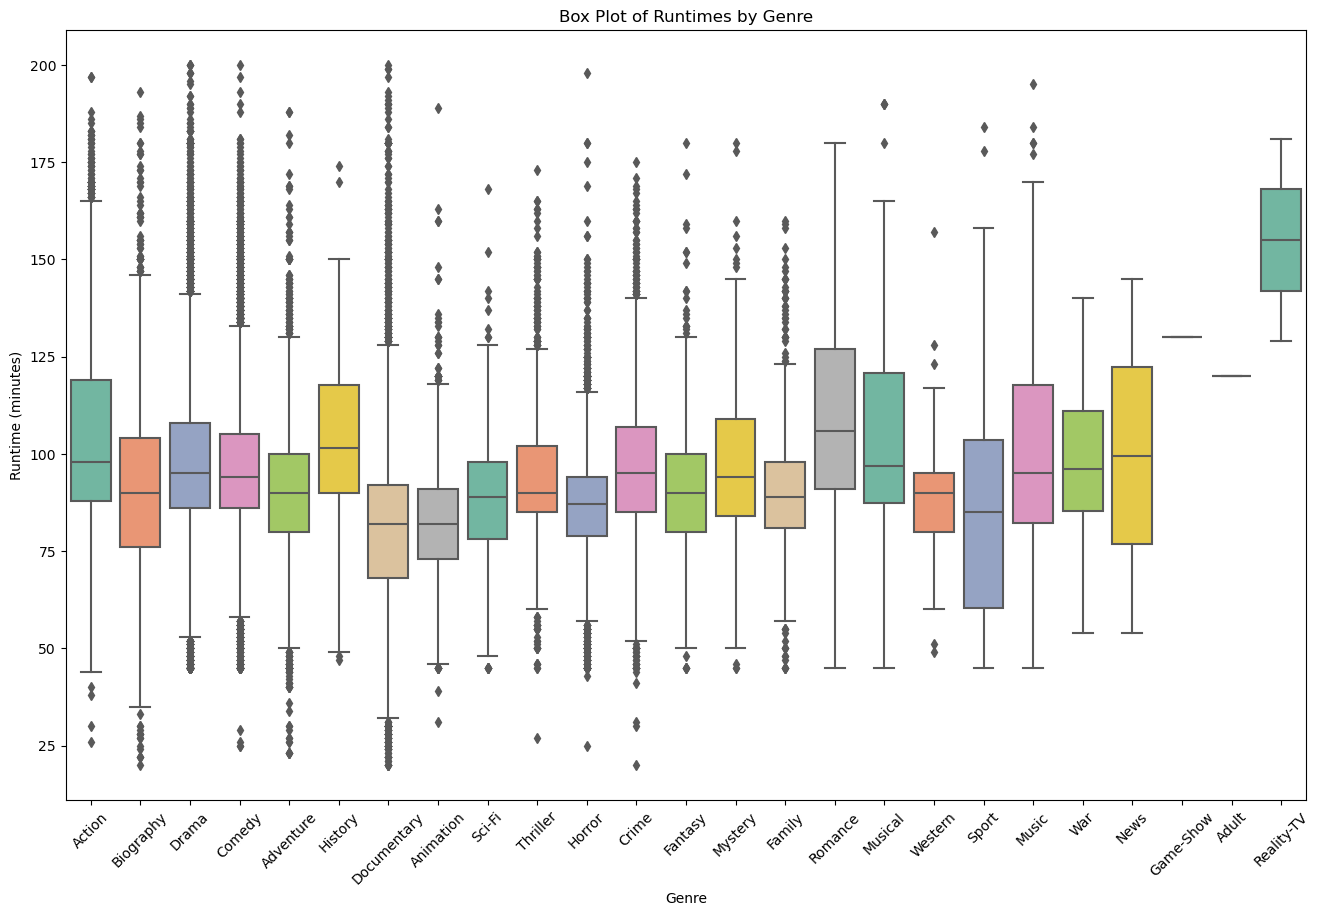

In [157]:
#To visualize the distrubution of runtimes in relation to genres
plt.figure(figsize=(16,10))
df['genre'] = df['genres'].str.split(',').str[0].str.strip()
sns.boxplot(data=df, x='genre', y='runtime_minutes', palette='Set2',showfliers = True)
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.title('Box Plot of Runtimes by Genre')
plt.xticks(rotation=45)
plt.show()

From this boxplot,it is evident that reality TV has higher run times compared to the other genres

Checking for the distribution of ratings and genres through the years

In [158]:
#Checking for the the first 10 movies with the highest runtimes and their genres
top_10_ratings = df.nlargest(10,'movie_rating')[['primary_title','movie_rating','genres']].set_index('primary_title')
top_10_ratings

,movie_rating,genres
primary_title,,
Exteriores: Mulheres Brasileiras na Diplomacia,10.0,Documentary
The Dark Knight: The Ballad of the N Word,10.0,"Comedy,Drama"
Freeing Bernie Baran,10.0,"Crime,Documentary"
Hercule contre Hermès,10.0,Documentary
I Was Born Yesterday!,10.0,Documentary
Revolution Food,10.0,Documentary
Fly High: Story of the Disc Dog,10.0,Documentary
The Paternal Bond: Barbary Macaques,10.0,Documentary
Requiem voor een Boom,10.0,Documentary


From the top 10 top rated movies, documentaries is the top rated genre

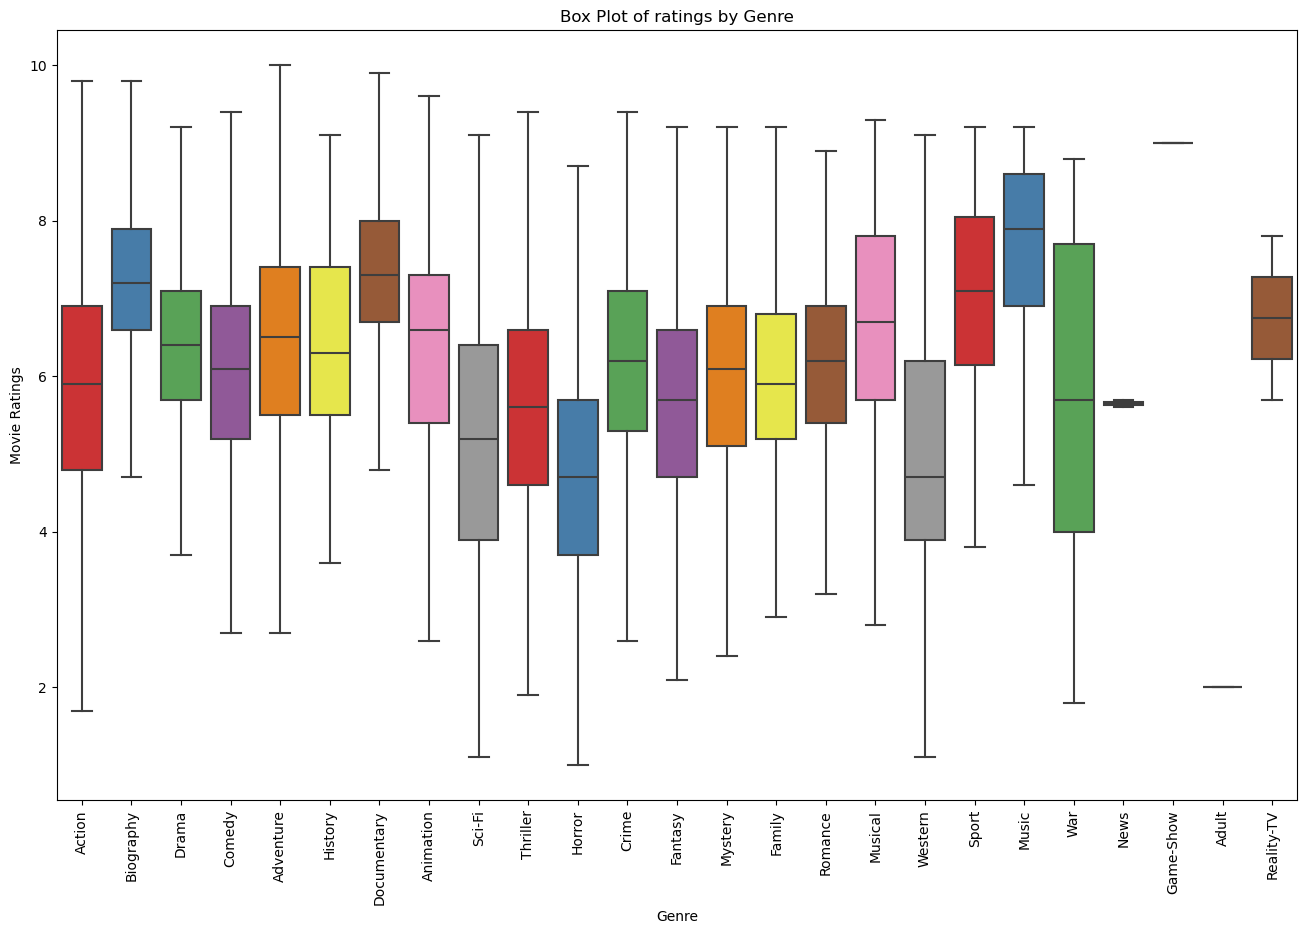

In [159]:
#To visualize the relationship between genres and their ratings
plt.figure(figsize=(16,10))
df['genre'] = df['genres'].str.split(',').str[0].str.strip()
sns.boxplot(data=df, x='genre', y='movie_rating', palette='Set1',showfliers=False)
plt.xlabel('Genre')
plt.ylabel('Movie Ratings')
plt.title('Box Plot of ratings by Genre')
plt.xticks(rotation=90)
plt.show()

From this boxplot, music movies have a higher average rating than the other genres 

Checking for the year with the highest average gross earnings

The release date is inclusive of date and month and for this we just want the years. We will convert the release date to years only

In [160]:
#conversion to years
data['release_date'] = data['release_date'].dt.year

In [161]:
#Checking for the average earnings of movies through the years
average_earnings = data.groupby('release_date')['worldwide_gross'].mean().sort_values(ascending=False)
print(average_earnings)

release_date
2018    1.824786e+08
2017    1.692240e+08
2016    1.313614e+08
2012    1.156729e+08
2013    1.107553e+08
2009    1.003943e+08
2019    9.965411e+07
2014    9.911344e+07
2011    9.714671e+07
2004    8.924908e+07
2010    8.843764e+07
2007    8.641767e+07
2015    8.225145e+07
2003    8.209727e+07
2008    8.155407e+07
2001    8.096845e+07
2005    7.888583e+07
2002    7.822510e+07
2006    7.163864e+07
2000    6.891062e+07
Name: worldwide_gross, dtype: float64


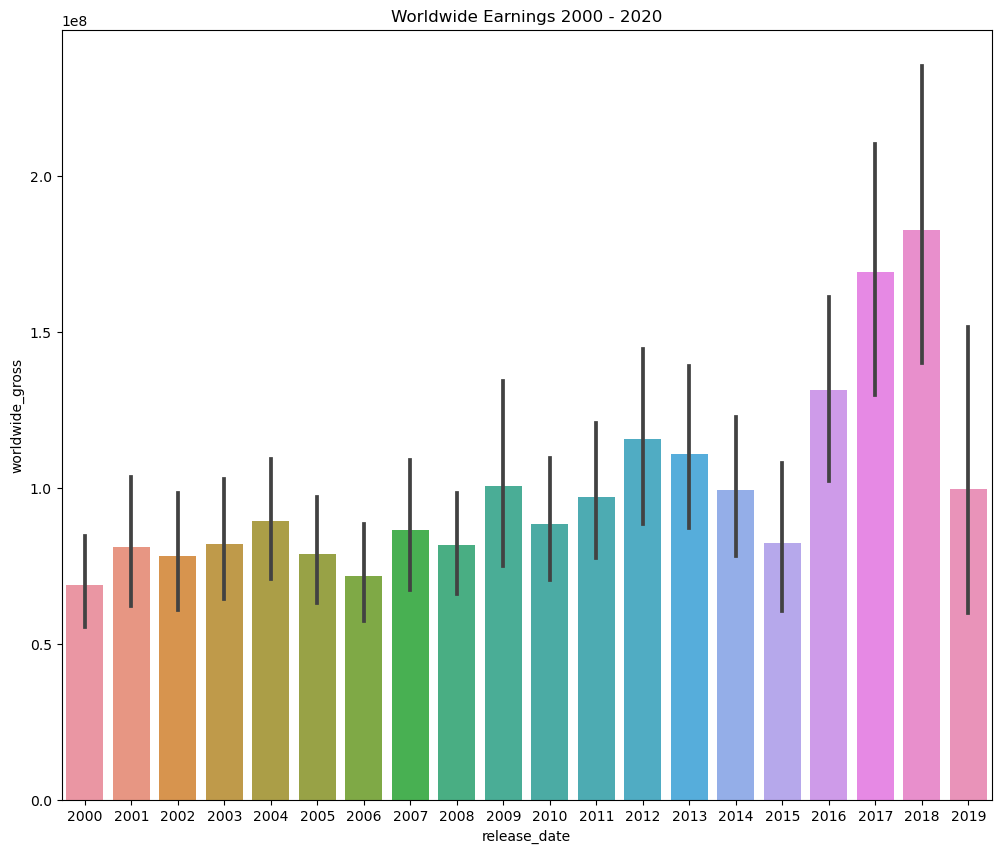

In [162]:
#To visualize the earnings throughout the years
plt.figure(figsize=(12,10))
sns.barplot(x='release_date', y='worldwide_gross',data=data)
plt.title('Worldwide Earnings 2000 - 2020')
plt.show()

## Summary

**Summary of Analysis:**

1. **Data Quality Enhancement:**
   - Through rigorous measures to address missing values, duplicates, and inconsistencies, the reliability and integrity of the sales data have been significantly improved. These enhancements ensure that the dataset is now more robust and suitable for subsequent analyses.

2. **Evaluation of Data Completeness:**
   - We conducted a thorough assessment of data completeness by identifying and addressing missing values across various columns. This process involved determining the extent of missing data and taking appropriate actions, including data deletion when necessary, to ensure a comprehensive dataset for analysis.

3. **Data Integrity Assurance:**
   - Measures were taken to ensure data integrity, including the identification and rectification of data anomalies such as negative NaN values. By eliminating inaccurate or implausible data points, we have enhanced the overall trustworthiness of the dataset.

4. **Data Type Refinement:**
   - We meticulously reviewed and refined data types to improve analytical capabilities. Key adjustments included converting dates into datetime objects for time-based analyses and transforming production budget, domestic gross, and worldwide gross into float values for accurate mathematical computations.

5. **Insights from Descriptive Statistics:**
   - Descriptive statistics were leveraged to glean insights into essential dataset attributes, offering a comprehensive summary of the data's characteristics. This analysis included measures of central tendency (mean, median, mode) and data dispersion (range, standard deviation), providing valuable insights for decision-making.

6. **Optimization of Movie Runtime:**
   - Our analysis revealed a consistent preference among audiences for movies with an average runtime of approximately 90 minutes. This finding underscores the importance of aligning movie runtimes with audience preferences to maximize engagement and satisfaction.

7. **Genre Preference and Rating Analysis:**
   - Examination of genre preferences and median ratings indicated that music-related movies tend to achieve higher ratings on average. This insight suggests potential opportunities for Microsoft to explore and capitalize on music-related genres in its movie production endeavors, pending market validation.

8. **Steady Investment Strategy Recommendation:**
   - Based on the analysis of average income per movie, which consistently hovers around $96 million, we recommend that Microsoft adopts a steady and sustainable investment strategy in movie production. This approach aims to maintain a consistent level of revenue generation over time.

9. **Correlation between Production Budget and Revenue:**
   - Our analysis revealed a positive correlation between production budgets and worldwide gross revenue, indicating that higher investments in production tend to yield higher returns. This insight underscores the importance of strategic budget allocation to maximize revenue generation in movie production ventures.


## Recommendations


**Recommendations for Microsoft:**

1. **Optimize Movie Runtimes:**
   - Consider targeting an average movie duration of around 90 minutes, as historical data indicates this aligns with audience preferences and can enhance viewer engagement.

2. **Genre Strategy:**
   - Prioritize the production or investment in music-related films, leveraging their tendency for higher median ratings. Additionally, explore other genres that align with the studio's vision and capabilities to diversify the content portfolio effectively.

3. **Budget Management for Revenue Optimization:**
   - Recognize the positive correlation between production budget and worldwide gross revenue. While higher investments may yield greater returns, conduct thorough financial analyses and risk assessments for high-budget productions. Maintain a balanced portfolio comprising both high and low-budget films to mitigate financial risks.

4. **Implement a Steady Investment Approach:**
   - Given the stability of average income per movie over the years (averaging around $96 million), establish a strategy of consistent investment in movie production. This entails setting an annual budget for production activities to ensure a steady flow of revenue.

5. **Diversify Portfolio for Risk Mitigation:**
   - Acknowledge the fluctuation observed in movie production trends, particularly the downturn experienced in 2019. To mitigate risks associated with such fluctuations, consider diversifying the movie portfolio. Aim for a balanced and sustainable production strategy, reducing reliance on a single year's output.

These recommendations aim to provide actionable guidance for Microsoft as it enters the film industry, leveraging insights from data analysis to inform strategic decision-making and enhance competitiveness in the market.
